In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## Define MAPE

In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    error=np.array(np.abs((y_true - y_pred) / y_true))
    return np.mean(error) * 100

# Load & prepare biker sharing data

### About the data

The dataset is the number of bicycles (as an integer) that passed specific measurement locations. Each colu​m​n represents a measurement location. The counters are considered accurate to within a range of +0%, -5% of the bikes that cross over the sensing section of the pathway or bike lane. What is Counted:

Source: https://www.kaggle.com/c/bike-sharing-demand/overview

In [3]:
yellow_stone = pd.read_csv('../datasets/yellow_stone/ysnp.csv')
yellow_stone['ds'] = pd.to_datetime(yellow_stone['Year/Month/Day'])
yellow_stone.rename(columns={'Recreation Visits':'y'}, inplace=True)
yellow_stone.sort_values('ds').head()

y  LowestTemperature(F)  HighestTemperature(F)  \
30    24708                 -17.0                   48.0   
61    29684                 -21.0                   58.0   
92    20165                   5.0                   62.0   
123   21681                   6.0                   67.0   
154  147767                  19.0                   84.0   

     WarmestMinimumTemperature(F)  ColdestMaximumTemperature(F)  \
30                           26.0                          16.0   
61                           32.0                          13.0   
92                           29.0                          35.0   
123                          34.0                          40.0   
154                          33.0                          40.0   

     AverageMinimumTemperature(F)  AverageMaximumTemperature(F)  \
30                            2.1                          30.0   
61                           10.5                          33.9   
92                           18.6                          46.3   
123                          22.7                          53.1   
154                          26.9                          60.9   

     MeanTemperature(F)  TotalPrecipitation(In)  TotalSnowfall(In)  ...  \
30                 16.1                    0.95               11.5  ...   
61                 22.2                    1.34               24.8  ...   
92                 32.5                    1.18                4.5  ...   
123                38.3                    1.33                3.5  ...   
154                43.9                    0.62                1.3  ...   

     Max 24hrSnowfall(In)  Year/Month/Day 3month Percent Change Airfare Costs  \
30                    2.0        1986/1/1                                 NaN   
61                    6.0        1986/2/1                                 NaN   
92                    1.0        1986/3/1                                 NaN   
123                   2.0        1986/4/1                                 NaN   
154                   1.0        1986/5/1                                 NaN   

     3month Percent Change Food Away From Home Costs  \
30                                               0.8   
61                                               0.8   
92                                               1.0   
123                                              1.1   
154                                              1.3   

     3month Percent Change Gasoline Costs  \
30                                    2.0   
61                                   -3.2   
92                                  -16.2   
123                                 -26.0   
154                                 -21.1   

     3month Percent Change Jet Fuel Costs  Consumer Price Index  \
30                                    1.0                   0.3   
61                                   -3.7                  -0.3   
92                                  -11.8                  -0.5   
123                                 -25.2                  -0.2   
154                                 -30.4                   0.3   

     Consumer Sentiment Index  Unemployment Rate         ds  
30                       95.6                6.7 1986-01-01  
61                       95.9                7.2 1986-02-01  
92                       95.1                7.2 1986-03-01  
123                      96.2                7.1 1986-04-01  
154                      94.8                7.2 1986-05-01  

[5 rows x 21 columns]

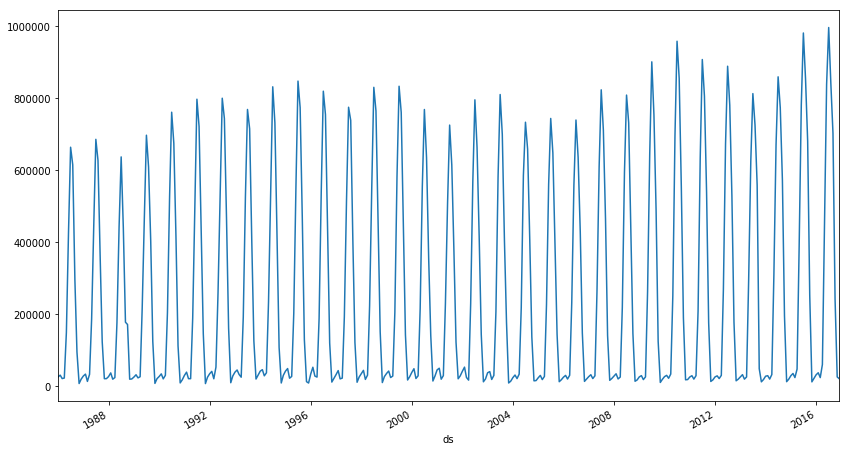

In [4]:
yellow_stone.set_index('ds')['y'].plot(figsize=(14,8))